import pandas as pd

In [4]:
students = pd.read_csv('C:/Users/Admin/Downloads/students.csv')
course_activity = pd.read_csv('C:/Users/Admin/Downloads/course_activity.csv')
feedback = pd.read_csv('C:/Users/Admin/Downloads/feedback.csv')

In [ ]:
# Check first few rows
print(students.head())
print(course_activity.head())
print(feedback.head())

In [6]:
# Check structure & data types
print(students.info())
print(course_activity.info())
print(feedback.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object 
 3   Time_Spent_Minutes     659 non-null    int64  
 4   Completion_Percentage  659 non-null    float64
dtypes: float64(1), in

In [7]:
# Check for missing values
print(students.isnull().sum())
print(course_activity.isnull().sum())
print(feedback.isnull().sum())

Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64
Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64
Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64


In [8]:
# Drop duplicates
students.drop_duplicates(inplace=True)
course_activity.drop_duplicates(inplace=True)
feedback.drop_duplicates(inplace=True)

In [35]:
# Convert 'Date' column to datetime with the correct format
course_activity['Date'] = pd.to_datetime(course_activity['Date'], format='%d/%m/%Y', errors='coerce')

In [36]:
# Convert dates to datetime
students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'])
course_activity['Date'] = pd.to_datetime(course_activity['Date'])

In [42]:
# Convert numeric fields to proper types
course_activity['Time_Spent_Minutes'] = pd.to_numeric(course_activity['Time_Spent_Minutes'], errors='coerce')
course_activity['Completion_Percentage'] = pd.to_numeric(course_activity['Completion_Percentage'], errors='coerce')
feedback['Rating'] = pd.to_numeric(feedback['Rating'], errors='coerce')

In [44]:
# Recheck for nulls or anomalies
print(course_activity.describe())
print(feedback['Rating'].value_counts())

                                Date  Time_Spent_Minutes  \
count                            659          659.000000   
mean   2024-02-15 14:18:45.341426432           98.113809   
min              2024-01-01 00:00:00           10.000000   
25%              2024-01-24 00:00:00           58.000000   
50%              2024-02-17 00:00:00           98.000000   
75%              2024-03-10 00:00:00          139.000000   
max              2024-03-31 00:00:00          180.000000   
std                              NaN           49.045548   

       Completion_Percentage  
count             659.000000  
mean               54.778710  
min                10.150000  
25%                32.070000  
50%                53.450000  
75%                77.560000  
max               100.000000  
std                26.289156  
Rating
1    19
4    18
5    15
3    15
2    13
Name: count, dtype: int64


In [45]:
# Save cleaned data (optional)
students.to_csv('clean_students.csv', index=False)
course_activity.to_csv('clean_course_activity.csv', index=False)
feedback.to_csv('clean_feedback.csv', index=False)

In [ ]:
#Exploratory Data Analysis (EDA)

In [46]:
# Calculate the overall average completion rate across all courses
average_completion_rate = course_activity['Completion_Percentage'].mean()
print(f"Overall average completion rate across courses: {average_completion_rate:.2f}%")

Overall average completion rate across courses: 54.78%


In [53]:
# Calculate the average engagement time per course
course_engagement = course_activity.groupby('Course_ID')['Time_Spent_Minutes'].mean()

# Find the course with the highest and lowest average engagement time
highest_engagement_course = course_engagement.idxmax()
lowest_engagement_course = course_engagement.idxmin()

highest_engagement_time = course_engagement.max()
lowest_engagement_time = course_engagement.min()

print(f"Course with highest engagement: {highest_engagement_course} ({highest_engagement_time:.2f} mins)")
print(f"Course with lowest engagement: {lowest_engagement_course} ({lowest_engagement_time:.2f} mins)")

Course with highest engagement: DM101 (102.43 mins)
Course with lowest engagement: PY202 (93.90 mins)


In [88]:
# Merge Age and Location from students into course_activity
merged_df = pd.merge(course_activity, students[['Student_ID', 'Age', 'Location']], on='Student_ID', how='left')

# Now calculate average engagement by Age and Location
age_engagement = merged_df.groupby('Age')['Time_Spent_Minutes'].mean()
location_engagement = merged_df.groupby('Location')['Time_Spent_Minutes'].mean()

print("Average engagement by age:")
print(age_engagement)

print("\nAverage engagement by location:")
print(location_engagement)

Average engagement by age:
Age
18    107.102041
19    100.619048
20     92.051724
21    118.062500
22    104.464286
23     81.384615
24     95.137931
25    102.910714
26    105.405405
27     94.470588
28     94.137931
29     90.000000
30    101.578947
31    104.551724
32     94.746032
33     92.321429
34     84.727273
Name: Time_Spent_Minutes, dtype: float64

Average engagement by location:
Location
Bangalore     98.000000
Chennai       90.946746
Delhi        103.302857
Kolkata      104.384615
Mumbai        95.435484
Name: Time_Spent_Minutes, dtype: float64


In [89]:
print(course_activity.columns)
print(students.columns)

Index(['Student_ID', 'Course_ID', 'Date', 'Time_Spent_Minutes',
       'Completion_Percentage'],
      dtype='object')
Index(['Student_ID', 'Name', 'Age', 'Gender', 'Location', 'Enrolment_Date'], dtype='object')


In [91]:
# Step 1: Merge 'students' data into 'course_activity' to get Age and Location
merged_df = pd.merge(course_activity, students[['Student_ID', 'Age', 'Location']], on='Student_ID', how='left')

# Step 2: Group by Age and Location to calculate average engagement
age_engagement = merged_df.groupby('Age')['Time_Spent_Minutes'].mean()
location_engagement = merged_df.groupby('Location')['Time_Spent_Minutes'].mean()

# Step 3: Print results
print("Average engagement by age:")
print(age_engagement)

print("\nAverage engagement by location:")
print(location_engagement)

Average engagement by age:
Age
18    107.102041
19    100.619048
20     92.051724
21    118.062500
22    104.464286
23     81.384615
24     95.137931
25    102.910714
26    105.405405
27     94.470588
28     94.137931
29     90.000000
30    101.578947
31    104.551724
32     94.746032
33     92.321429
34     84.727273
Name: Time_Spent_Minutes, dtype: float64

Average engagement by location:
Location
Bangalore     98.000000
Chennai       90.946746
Delhi        103.302857
Kolkata      104.384615
Mumbai        95.435484
Name: Time_Spent_Minutes, dtype: float64


In [95]:
# Calculate the average feedback rating per course
average_feedback_rating = feedback.groupby('Course_ID')['Rating'].mean()

print("Average feedback rating per course:")
print(average_feedback_rating)

Average feedback rating per course:
Course_ID
DM101    2.900000
PY202    3.277778
UX303    2.923077
WD404    2.789474
Name: Rating, dtype: float64


In [96]:
# Merge course_activity and feedback datasets based on 'Course Name'
merged_data = pd.merge(course_activity, feedback, on='Course_ID', how='inner')

# Calculate the correlation between 'Completion %' and 'Rating [1-5]'
correlation = merged_data[['Completion_Percentage', 'Rating']].corr()

print("Correlation between Completion Rate and Feedback Rating:")
print(correlation)

Correlation between Completion Rate and Feedback Rating:
                       Completion_Percentage    Rating
Completion_Percentage               1.000000  0.004269
Rating                              0.004269  1.000000


In [252]:
print(merged_data_students.columns)
print(students.columns)

Index(['Student_ID_x', 'Course_ID', 'Date', 'Time_Spent_Minutes',
       'Completion_Percentage', 'Student_ID_y', 'Rating', 'Feedback_Text'],
      dtype='object')
Index(['Student_ID', 'Name', 'Age', 'Gender', 'Location', 'Enrolment_Date'], dtype='object')


In [254]:
print("Columns in merged_data_students:", merged_data_students.columns.tolist())
print("Columns in students:", students.columns.tolist())

Columns in merged_data_students: ['Student_ID_x', 'Course_ID', 'Date', 'Time_Spent_Minutes', 'Completion_Percentage', 'Student_ID_y', 'Rating', 'Feedback_Text']
Columns in students: ['Student_ID', 'Name', 'Age', 'Gender', 'Location', 'Enrolment_Date']


In [256]:
print("course_activity columns:", course_activity.columns.tolist())
print("feedback columns:", feedback.columns.tolist())
print("students columns:", students.columns.tolist())

course_activity columns: ['Student_ID', 'Course_ID', 'Date', 'Time_Spent_Minutes', 'Completion_Percentage']
feedback columns: ['Student_ID', 'Course_ID', 'Rating', 'Feedback_Text']
students columns: ['Student_ID', 'Name', 'Age', 'Gender', 'Location', 'Enrolment_Date']


In [257]:
# Merge course_activity and feedback on BOTH Course_ID and Student_ID
merged = pd.merge(course_activity, feedback, on=['Course_ID', 'Student_ID'], how='inner')

# Now merge with students on Student_ID
merged_data_students = pd.merge(merged, students, on='Student_ID', how='inner')

In [258]:
print("course_activity columns:", course_activity.columns)
print("feedback columns:", feedback.columns)
print("students columns:", students.columns)

course_activity columns: Index(['Student_ID', 'Course_ID', 'Date', 'Time_Spent_Minutes',
       'Completion_Percentage'],
      dtype='object')
feedback columns: Index(['Student_ID', 'Course_ID', 'Rating', 'Feedback_Text'], dtype='object')
students columns: Index(['Student_ID', 'Name', 'Age', 'Gender', 'Location', 'Enrolment_Date'], dtype='object')


In [263]:
print("Columns in merged_data_students:\n", merged_data_students.columns.tolist())

Columns in merged_data_students:
 ['Student_ID_x', 'Course_ID', 'Date', 'Time_Spent_Minutes', 'Completion_Percentage', 'Student_ID_y', 'Rating', 'Feedback_Text', 'Engagement + Satisfaction']


In [264]:
print(merged_data_students.head())

  Student_ID_x Course_ID       Date  Time_Spent_Minutes  \
0         S001     PY202 2024-01-05                  90   
1         S001     PY202 2024-01-05                  90   
2         S001     PY202 2024-01-05                  90   
3         S001     PY202 2024-01-05                  90   
4         S001     PY202 2024-01-05                  90   

   Completion_Percentage Student_ID_y  Rating       Feedback_Text  \
0                   46.1         S063       2  Loved the examples   
1                   46.1         S022       4     Could be better   
2                   46.1         S011       5   Needs improvement   
3                   46.1         S094       4     Well structured   
4                   46.1         S035       4        Very helpful   

   Engagement + Satisfaction  
0                       63.6  
1                       64.2  
2                       64.5  
3                       64.2  
4                       64.2  


In [265]:
merged = pd.merge(course_activity, feedback, on=['Course_ID', 'Student_ID'], how='inner')
merged_data_students = pd.merge(merged, students, on='Student_ID', how='inner')

In [266]:
merged_data_students['Engagement + Satisfaction'] = (
    merged_data_students['Time_Spent_Minutes'] * 0.7
    + merged_data_students['Rating'] * 0.3
)

top_3_segments = merged_data_students.groupby(['Age', 'Location'])['Engagement + Satisfaction'].mean().nlargest(3)

In [267]:
print(merged_data_students.columns)

Index(['Student_ID', 'Course_ID', 'Date', 'Time_Spent_Minutes',
       'Completion_Percentage', 'Rating', 'Feedback_Text', 'Name', 'Age',
       'Gender', 'Location', 'Enrolment_Date', 'Engagement + Satisfaction'],
      dtype='object')


In [269]:
# Create a new 'Engagement + Satisfaction' metric (could be a weighted sum or other metric)
merged_data_students['Engagement + Satisfaction'] = (merged_data_students['Time_Spent_Minutes'] * 0.7) + (merged_data_students['Rating'] * 0.3)

# Find top 3 student segments based on the 'Engagement + Satisfaction' metric
top_3_segments = merged_data_students.groupby(['Age', 'Location'])['Engagement + Satisfaction'].mean().nlargest(3)

print("Top 3 student segments based on engagement and satisfaction:")
print(top_3_segments)

Top 3 student segments based on engagement and satisfaction:
Age  Location 
24   Bangalore    123.0
30   Bangalore    122.3
     Delhi        117.2
Name: Engagement + Satisfaction, dtype: float64


In [ ]:
#Visualisations

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

# For inline display in Jupyter
%matplotlib inline

C:\Users\Admin\AppData\Local\Temp\ipykernel_9876\1446210188.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_data_students, x='Course_ID', y='Time_Spent_Minutes', estimator='mean', ci=None)


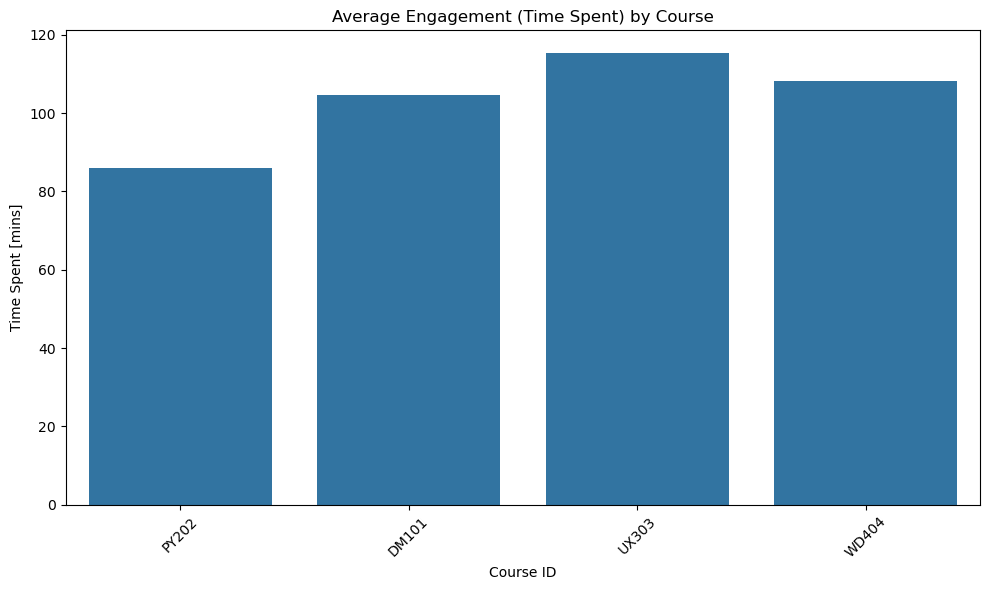

In [273]:
#Engagement by Course (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data_students, x='Course_ID', y='Time_Spent_Minutes', estimator='mean', ci=None)
plt.title('Average Engagement (Time Spent) by Course')
plt.ylabel('Time Spent [mins]')
plt.xlabel('Course ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

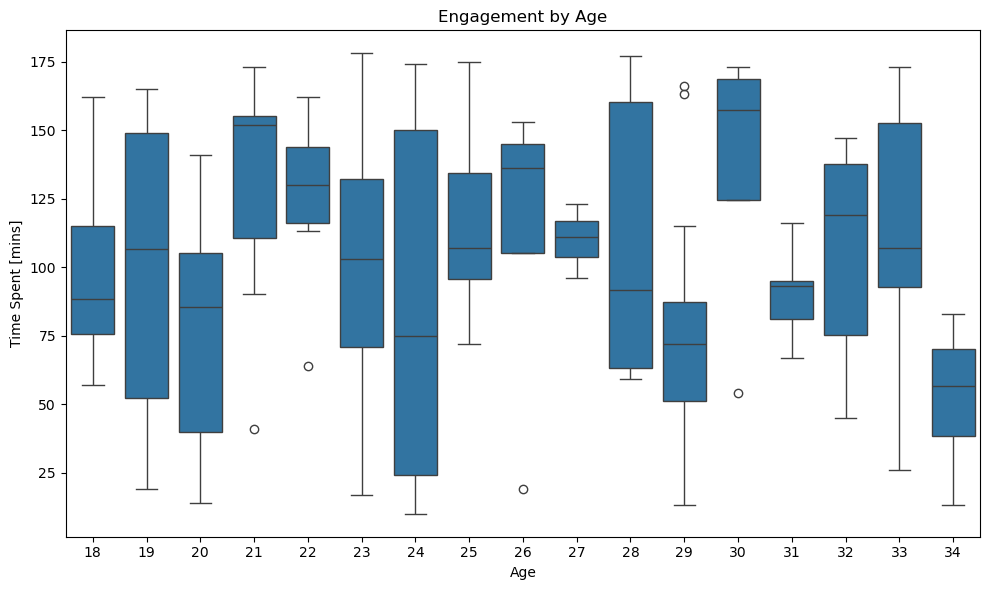

In [274]:
#Engagement by Demographics (Age Group) (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data_students, x='Age', y='Time_Spent_Minutes')
plt.title('Engagement by Age')
plt.ylabel('Time Spent [mins]')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9876\3772697465.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_data_students, x='Course_ID', y='Rating', estimator='mean', ci=None)


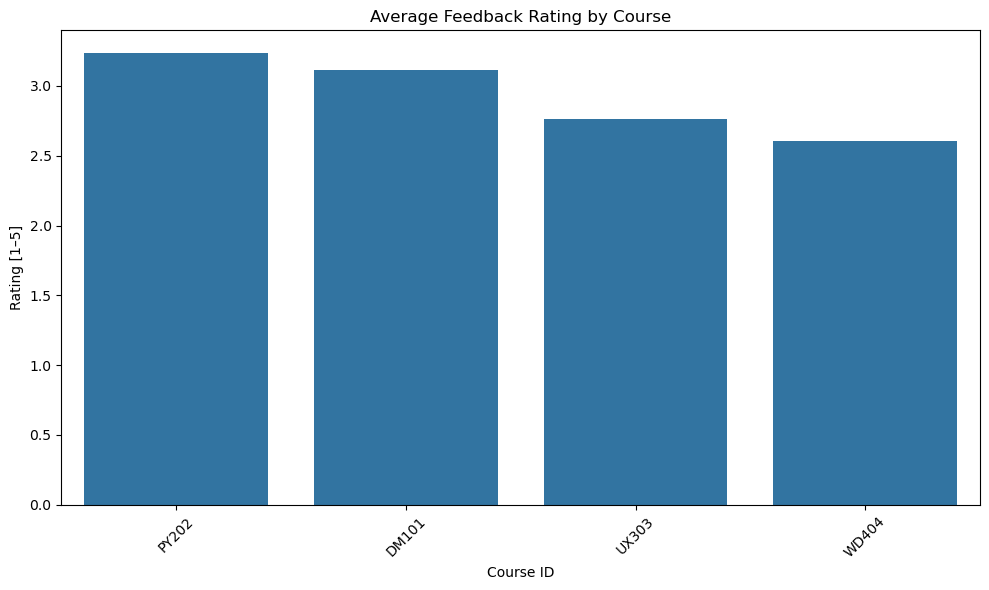

In [275]:
#Feedback Rating by Course (Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data_students, x='Course_ID', y='Rating', estimator='mean', ci=None)
plt.title('Average Feedback Rating by Course')
plt.ylabel('Rating [1–5]')
plt.xlabel('Course ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

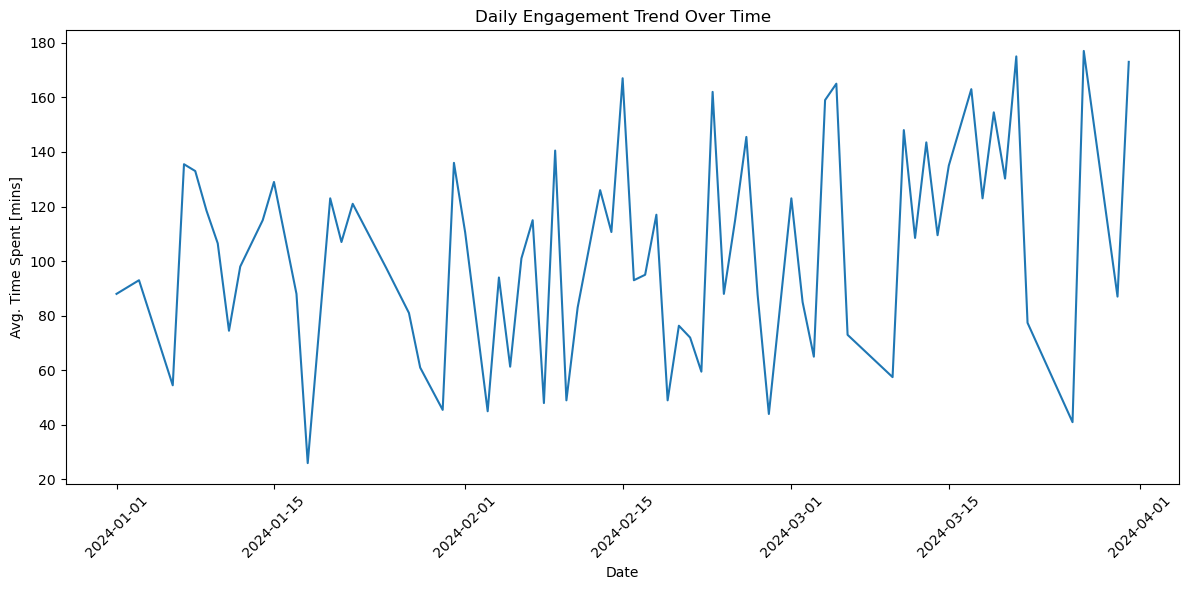

In [276]:
#Trend Over Time (Line Plot)
# Make sure 'Date' is in datetime format
merged_data_students['Date'] = pd.to_datetime(merged_data_students['Date'])

# Group by date to get average engagement
daily_trend = merged_data_students.groupby('Date')['Time_Spent_Minutes'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_trend, x='Date', y='Time_Spent_Minutes')
plt.title('Daily Engagement Trend Over Time')
plt.ylabel('Avg. Time Spent [mins]')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

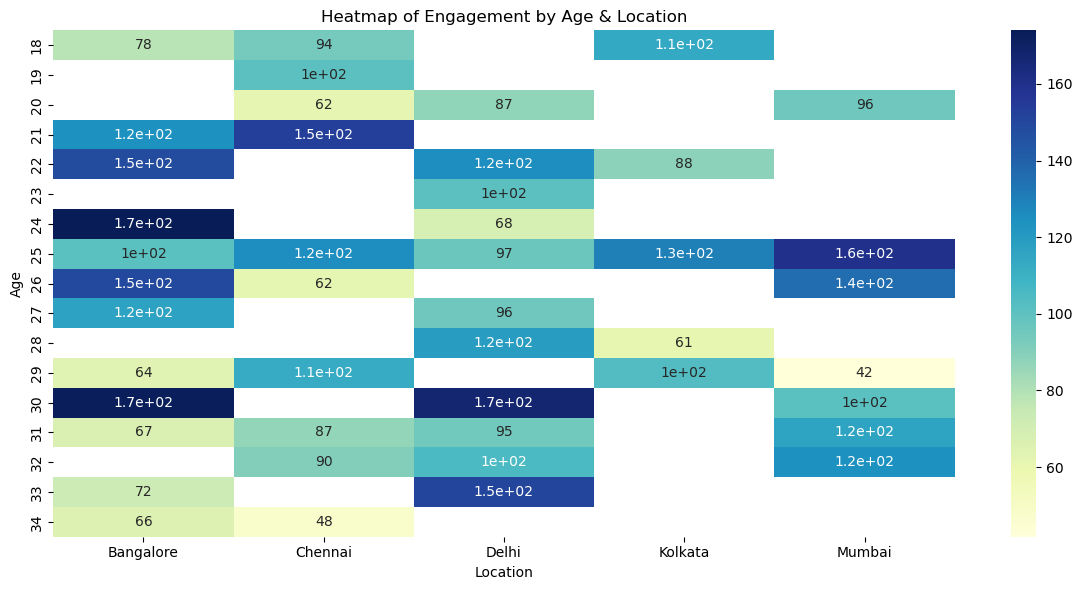

In [278]:
#Heatmap of Engagement by Age & Location
pivot = merged_data_students.pivot_table(index='Age', columns='Location', values='Time_Spent_Minutes', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Engagement by Age & Location')
plt.tight_layout()
plt.show()